In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets_401148_769675_suv_data.csv')
df.head() # Reading the dataset from csv file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# to find the no of datas in the particular data
print( "no of User Ids in the data is :" +str(len(df.index)) )

no of User Ids in the data is :400


# Analyzing the Data

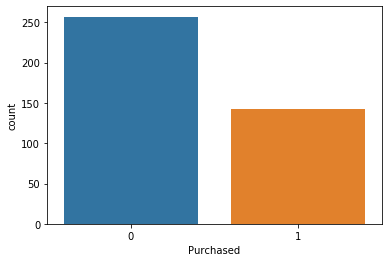

In [4]:
sns.countplot ( x = "Purchased" , data = df)

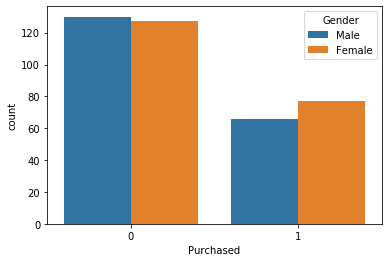

In [5]:
# comparing
sns.countplot(x = "Purchased", hue = "Gender", data = df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


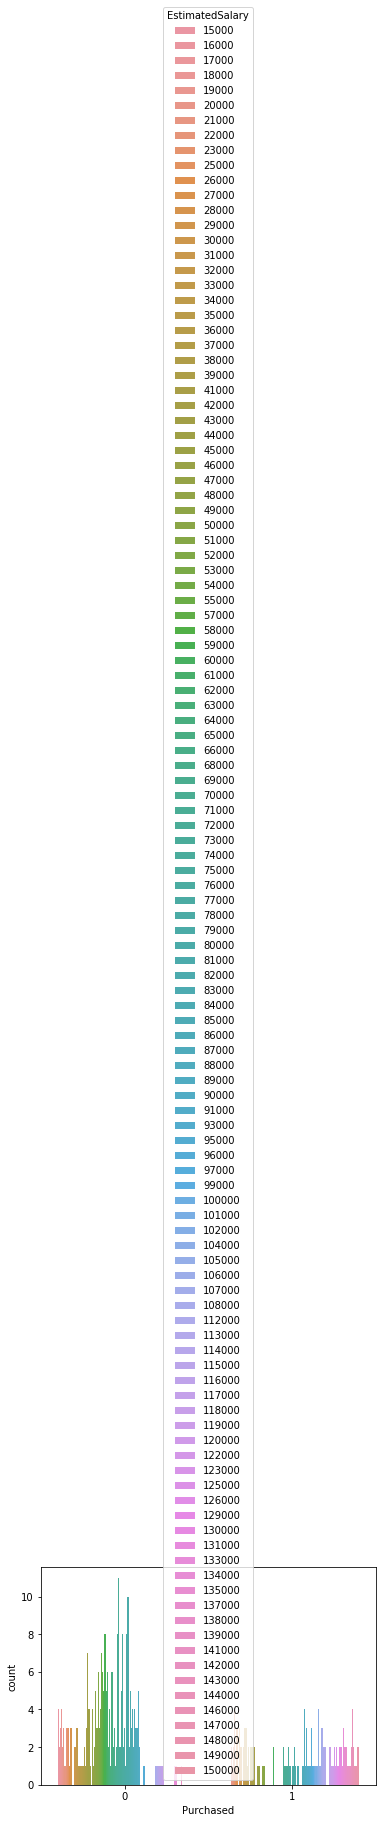

In [7]:
sns.countplot(x = "Purchased", hue = "EstimatedSalary", data = df)

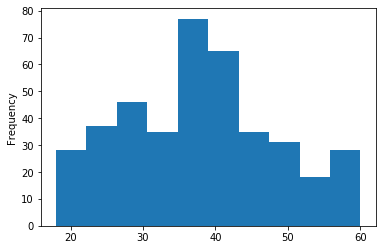

In [8]:
# Age distribution
df["Age"].plot.hist()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


# Data Wrangling

In [10]:
# Aactually it means cleaning the data , and also to check whether the data has any null values
# 1st check the null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

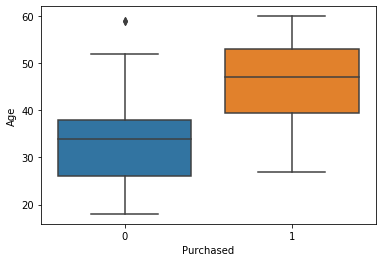

In [11]:
# using the boxplot 
sns.boxplot(x = "Purchased" , y = "Age" ,data = df) 

In [12]:
# Lets drop the unwanted columns
df.drop("User ID" , axis = 1 , inplace = True)

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [14]:
# here lets convert the string values to categoriable variables
gen = pd.get_dummies(df['Gender'] , drop_first=True)
gen.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [15]:
df.drop("Gender" , axis = 1 , inplace = True )
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
df =pd.concat([df,gen], axis=1)
df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
5,27,58000,0,1
6,27,84000,0,0
7,32,150000,1,0
8,25,33000,0,1
9,35,65000,0,0


In [23]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Traning and Testing the data

In [24]:
# selsecting the IDV and DV
X = df.drop('Purchased' , axis = 1)
y = df['Purchased']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression() 
model.fit(X_train , y_train) # Fitting the model ot the LR

LogisticRegression()

In [26]:
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
classification_report(y_test , predictions)

C:\Users\BHUBESH\Anaconda2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        72\n           1       0.00      0.00      0.00        48\n\n    accuracy                           0.60       120\n   macro avg       0.30      0.50      0.37       120\nweighted avg       0.36      0.60      0.45       120\n'

In [30]:
# using the confusion matrix
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test , predictions)

array([[72,  0],
       [48,  0]], dtype=int64)

In [32]:
# accuaracy score
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test , predictions)

0.6